In [1]:
import pandas as pd
import numpy as np

# Generate date range
dates = pd.date_range(start="2020-01-01", end="2023-12-31", freq="D")

# Synthetic data logic
np.random.seed(42)
data = {
    "Date": dates,
    "Gasoline_Demand": np.random.randint(400_000, 600_000, len(dates)),
    "Diesel_Demand": np.random.randint(200_000, 400_000, len(dates)),
    "Crude_Price": np.random.uniform(60, 100, len(dates)),
    "Avg_Temperature": np.random.uniform(10, 90, len(dates)),
    "Holiday_Flag": np.random.choice([0, 1], len(dates), p=[0.95, 0.05]),
    "Industrial_Activity_Index": np.random.uniform(90, 110, len(dates))
}

df = pd.DataFrame(data)
df.to_csv("fuel_demand_data.csv", index=False)

In [2]:
df.head(10)

,Date,Gasoline_Demand,Diesel_Demand,Crude_Price,Avg_Temperature,Holiday_Flag,Industrial_Activity_Index
0,2020-01-01,521958,328377,83.721773,17.070796,0,105.658472
1,2020-01-02,546867,201622,75.661028,65.915906,1,98.853097
2,2020-01-03,531932,248756,76.504874,39.467777,1,99.705335
3,2020-01-04,503694,240809,87.824726,44.587698,0,105.558188
4,2020-01-05,519879,216725,60.128731,12.491927,0,97.647267
5,2020-01-06,510268,392468,84.783573,30.766116,0,98.862547
6,2020-01-07,454886,251226,74.219720,12.694112,0,97.523809
7,2020-01-08,537337,281182,91.767893,80.334862,0,97.346810
8,2020-01-09,568266,229402,63.719626,29.471735,0,100.518932
9,2020-01-10,487498,204263,83.528091,54.586974,0,106.175989


In [3]:
df.shape

(1461, 7)

In [5]:
df.describe()

,Date,Gasoline_Demand,Diesel_Demand,Crude_Price,Avg_Temperature,Holiday_Flag,Industrial_Activity_Index
count,1461,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000
mean,2021-12-31 00:00:00,499989.355921,302437.267625,79.879226,49.377113,0.057495,99.848988
min,2020-01-01 00:00:00,400126.000000,200163.000000,60.000465,10.002458,0.000000,90.004820
25%,2020-12-31 00:00:00,450990.000000,251571.000000,70.348466,29.242527,0.000000,94.939308
50%,2021-12-31 00:00:00,503177.000000,302747.000000,80.004510,49.026745,0.000000,99.749357
75%,2022-12-31 00:00:00,548056.000000,354470.000000,89.636162,69.331316,0.000000,104.770781
max,2023-12-31 00:00:00,599976.000000,399988.000000,99.933900,89.964616,1.000000,109.984146
std,NaN,57577.870111,57664.396846,11.455542,23.069803,0.232865,5.719391


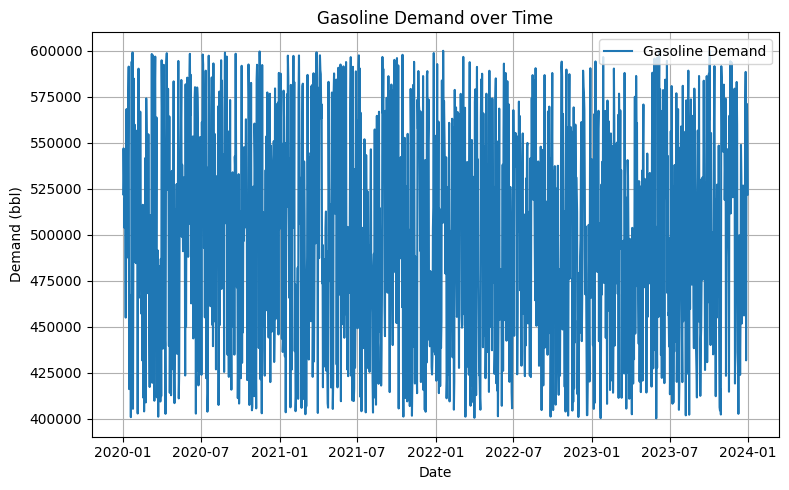

In [10]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(8,5))
plt.plot(df['Date'], df['Gasoline_Demand'], label='Gasoline Demand')
plt.title('Gasoline Demand over Time')
plt.xlabel('Date')
plt.ylabel('Demand (bbl)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show() 



In [9]:
#CHECKING MISSING VALUES

df.isnull().sum()

Date                         0
Gasoline_Demand              0
Diesel_Demand                0
Crude_Price                  0
Avg_Temperature              0
Holiday_Flag                 0
Industrial_Activity_Index    0
dtype: int64

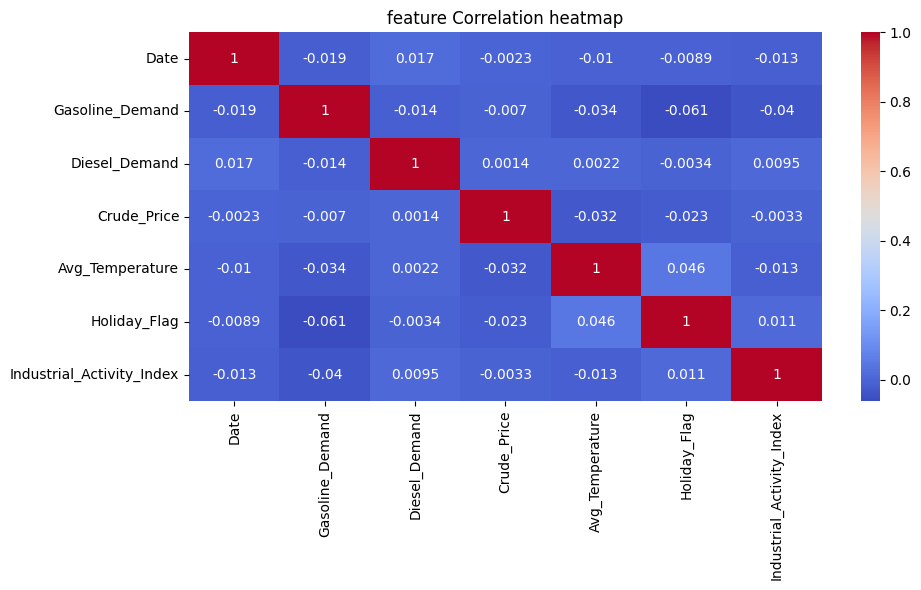

In [12]:
#Correlation matrix 

import seaborn as sns 

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('feature Correlation heatmap')
plt.tight_layout()
plt.show()

In [13]:
#Feature Engineering 

df.sort_values("Date", inplace=True)

# Reset index after sorting
df.reset_index(drop=True, inplace=True)

In [14]:
# --- Time-based features ---
df['Day_of_Week'] = df['Date'].dt.dayofweek      # 0=Monday, 6=Sunday
df['Month'] = df['Date'].dt.month

In [15]:
# --- Lag features (previous days' demand) ---
df['Lag_1'] = df['Gasoline_Demand'].shift(1)
df['Lag_7'] = df['Gasoline_Demand'].shift(7)
df['Lag_14'] = df['Gasoline_Demand'].shift(14)

In [16]:
df['RollingMean_7'] = df['Gasoline_Demand'].rolling(window=7).mean()
df['RollingMean_30'] = df['Gasoline_Demand'].rolling(window=30).mean()

In [17]:
df.dropna(inplace=True)

In [18]:
df.head(5)

,Date,Gasoline_Demand,Diesel_Demand,Crude_Price,Avg_Temperature,Holiday_Flag,Industrial_Activity_Index,Day_of_Week,Month,Lag_1,Lag_7,Lag_14,RollingMean_7,RollingMean_30
29,2020-01-30,556730,384074,77.607960,89.810264,0,91.054196,3,1,530608.0,599041.0,441090.0,517979.000000,510722.600000
30,2020-01-31,484478,289599,65.898101,29.319719,0,90.751325,4,1,556730.0,405311.0,467221.0,529288.571429,509473.266667
31,2020-02-01,522537,355834,73.127710,13.228066,0,104.343629,5,2,484478.0,503355.0,464820.0,532028.857143,508662.266667
32,2020-02-02,549503,211046,77.360775,42.895321,0,100.761893,6,2,522537.0,584779.0,400769.0,526989.428571,509247.966667
33,2020-02-03,530523,316021,63.544017,20.406454,0,100.174120,0,2,549503.0,485305.0,459735.0,533449.142857,510142.266667


In [20]:
df.drop(columns='Date')

,Gasoline_Demand,Diesel_Demand,Crude_Price,Avg_Temperature,Holiday_Flag,Industrial_Activity_Index,Day_of_Week,Month,Lag_1,Lag_7,Lag_14,RollingMean_7,RollingMean_30
29,556730,384074,77.607960,89.810264,0,91.054196,3,1,530608.0,599041.0,441090.0,517979.000000,510722.600000
30,484478,289599,65.898101,29.319719,0,90.751325,4,1,556730.0,405311.0,467221.0,529288.571429,509473.266667
31,522537,355834,73.127710,13.228066,0,104.343629,5,2,484478.0,503355.0,464820.0,532028.857143,508662.266667
32,549503,211046,77.360775,42.895321,0,100.761893,6,2,522537.0,584779.0,400769.0,526989.428571,509247.966667
33,530523,316021,63.544017,20.406454,0,100.174120,0,2,549503.0,485305.0,459735.0,533449.142857,510142.266667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,431653,209596,86.478758,53.763628,0,95.240700,2,12,588456.0,526678.0,423752.0,494764.428571,494652.000000
1457,557729,307539,92.597589,16.995720,0,107.634346,3,12,431653.0,474532.0,455029.0,506649.714286,494541.400000
1458,571024,218313,91.121010,40.189054,0,107.836404,4,12,557729.0,481994.0,548757.0,519368.285714,494351.533333
1459,553252,313175,90.434053,43.081322,0,93.928826,5,12,571024.0,456133.0,530282.0,533242.428571,493481.366667


In [21]:
df['Holiday_Flag'].value_counts()

Holiday_Flag
0    1351
1      81
Name: count, dtype: int64

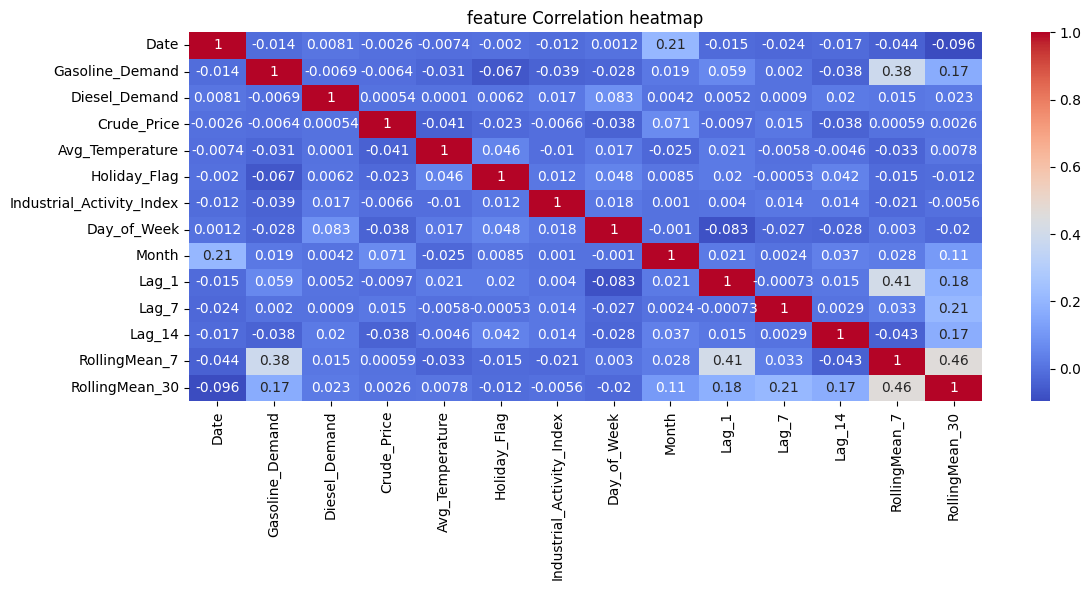

In [23]:
import seaborn as sns 

plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('feature Correlation heatmap')
plt.tight_layout()
plt.show()